In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from warnings import filterwarnings
filterwarnings('ignore')
import joblib

data = pd.read_csv('output.csv')

X = data[['X', 'Y', 'Z']]
y = data[['PixelX', 'PixelY']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(10,10), max_iter=1, warm_start=True)

train_losses = []
test_losses = []

In [25]:
for i in range(2500):  
    model.fit(X_train_scaled, y_train)
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    
    train_loss = mean_squared_error(y_train, train_pred)
    test_loss = mean_squared_error(y_test, test_pred)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    if i%100 == 1:
        print('Loss:', train_loss, test_loss)

Loss: 32.34376803191414 26.03640786234263
Loss: 32.343766489207994 26.036412353531613
Loss: 32.34376494632757 26.036416820119832
Loss: 32.34376340327432 26.036421262515343
Loss: 32.343761860049874 26.036425681116405
Loss: 32.34376031665574 26.036430076311582
Loss: 32.34375877309283 26.0364344484782
Loss: 32.34375722936258 26.036438797982612
Loss: 32.343755685465815 26.03644312517943
Loss: 32.34375414140439 26.03644743041828
Loss: 32.343752597180234 26.036451714038396
Loss: 32.34375105279472 26.036455976370362
Loss: 32.34374950824825 26.036460217737112
Loss: 32.343747963542086 26.03646443845123
Loss: 32.34374641867721 26.036468638818334
Loss: 32.343744873655794 26.03647281913787
Loss: 32.34374332847869 26.03647697970257
Loss: 32.34374178314639 26.03648112079498
Loss: 32.34374023766014 26.03648524269378
Loss: 32.34373869202125 26.036489345670105
Loss: 32.343737146231476 26.036493429989807
Loss: 32.343735600291055 26.03649749591287
Loss: 32.34373405420213 26.036501543690335
Loss: 32.34373

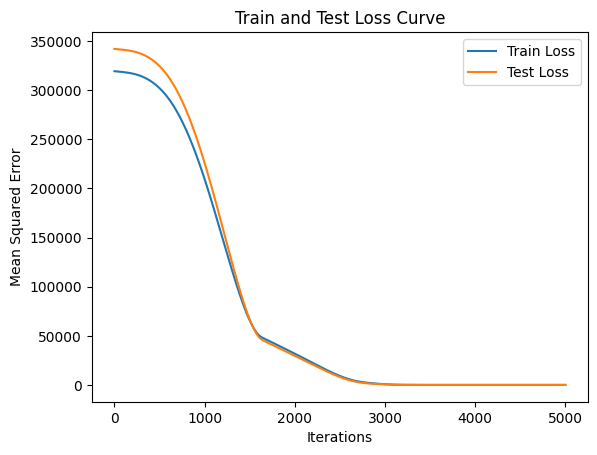

In [20]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Train and Test Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [21]:
joblib.dump(model, 'NN_model_xyz_to_XY.pkl')

['NN_model_xyz_to_XY.pkl']

In [22]:
loaded_model = joblib.load('NN_model_xyz_to_XY.pkl')
sample_input = [[0.5, -1.2, 3.4]]
sample_input_scaled = scaler.transform(sample_input)
prediction = loaded_model.predict(sample_input_scaled)

print("Predicted PixelX, PixelY:", prediction)


Predicted PixelX, PixelY: [[ 781.96230955 1670.23623984]]


In [23]:
import joblib
import numpy as np

# Load the model
loaded_model = joblib.load('NN_model_xyz_to_XY.pkl')

# Define the input data (X, Y, Z values)
input_data = np.array([
    [-8.179, 1.226, 26.594],
    [-8.139, 2.576, 26.746],
    [-8.289, 4.123, 27.328],
    [-8.283, 5.653, 27.431],
    [-8.238, 7.08, 27.312],
    [-8.256, 8.501, 27.454],
    [-7.866, 9.739, 26.589],
    [-8.279, -10.466, 26.065]
])

# Original PixelX, PixelY values for comparison
original_outputs = np.array([
    [54, 560],
    [52, 624],
    [52, 682],
    [49, 757],
    [54, 810],
    [61, 879],
    [59, 938],
    [57, 51]
])

# Scale the input data
input_data_scaled = scaler.transform(input_data)

# Make predictions
predictions = loaded_model.predict(input_data_scaled)

# Print results
print("Predicted vs Original PixelX, PixelY values:")
for i, (pred, orig) in enumerate(zip(predictions, original_outputs)):
    print(f"Point {i+1}: Predicted {pred}, Original {orig}")


Predicted vs Original PixelX, PixelY values:
Point 1: Predicted [ 56.01557317 558.96764096], Original [ 54 560]
Point 2: Predicted [ 56.24468777 618.7452638 ], Original [ 52 624]
Point 3: Predicted [ 55.04275035 683.29648767], Original [ 52 682]
Point 4: Predicted [ 60.25271768 749.17725306], Original [ 49 757]
Point 5: Predicted [ 65.88698163 812.06003211], Original [ 54 810]
Point 6: Predicted [ 71.00333417 872.7299064 ], Original [ 61 879]
Point 7: Predicted [ 87.62634419 932.20426786], Original [ 59 938]
Point 8: Predicted [73.51802961 62.66801162], Original [57 51]
